In [152]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.stats

#read the csv file
input_readings = np.loadtxt('dataset_FLD.csv',delimiter=',')
#segregate labels and data
labels = input_readings[:,-1]
data = input_readings[:,0:len(input_readings[0])-1]

nclasses = len(np.unique(labels))
nfeatures = len(data[0])
print("No. of classes = {}".format(nclasses))
print("No. of features = {}".format(nfeatures))
class_pos = []
for i in range(nclasses):
    class_pos.append(np.argwhere(labels == i))

No. of classes = 2
No. of features = 3


In [153]:
#initialising variables
class_mean, other_class_mean = np.empty((nclasses,nfeatures)),np.empty((nclasses,nfeatures))
sd, other_sd = np.empty((nfeatures,nfeatures)),np.empty((nfeatures,nfeatures))
sw,sc_1,sc_2 = np.zeros((nclasses, nfeatures, nfeatures)),((nclasses, nfeatures, nfeatures)),((nclasses, nfeatures, nfeatures))
w = np.zeros((nclasses, nfeatures, 1))
other_class = []

In [154]:
for i in range(nclasses):
    scatter_1 = np.empty((nclasses,nfeatures))
    scatter_2 = np.empty((nclasses,nfeatures))
    
    #calculating the class means and standard deviation
    class_mean[i] = np.mean(data[class_pos[i]],axis=0)
    other_class.append(np.delete(data,class_pos[i],axis=0))
    other_class_mean[i] = np.mean(other_class[i],axis=0)
    
    #calculate scatter matrix
    sd[i] = np.std(data[class_pos[i]],axis=0)
    other_sd[i] = np.std(other_class[i],axis=0)
    scatter_1 = np.subtract(data[class_pos[i]].reshape(-1,nfeatures),class_mean[i])
    sc_1 = scatter_1.T.dot(scatter_1)
    scatter_2 = np.subtract(other_class[i],other_class_mean[i])
    sc_2 = scatter_2.T.dot(scatter_2)
    
    #calculate SW
    N1 = len(data[class_pos[i]])
    N2 = len(other_class[i])
    sw[i] = sc_1/N1 + sc_2/N2
    
    #calculate w using the formula w = SW(^-1)(M1-M2)
    w[i] = np.dot(np.linalg.pinv(sw[i]),np.subtract(other_class_mean[i],class_mean[i]).reshape(-1,1))
    w[i] /= np.linalg.norm(w[i])
W = w[1]

In [155]:
from collections import defaultdict
#projecting the 3d points onto the unit weight vector (w^T.X)
#calculating the mean and standard deviation of the projected points
class_pro = defaultdict(list)
means = []
std_dev = []

for i in range(nclasses):
    for x in data[class_pos[i]]:
        class_pro[i].append(float(w[1].T.dot(x.T)))
    means.append(np.array(class_pro[i]).mean())
    std_dev.append(np.array(class_pro[i]).std())



In [162]:
pts = 100000
x_intersect,y_intersect = 0,0
x_min,x_max = -2,2
x = np.linspace(x_min,x_max,pts)

#normal distribution for 1D points
y0 = scipy.stats.norm.pdf(x,means[0],std_dev[0])
y1 = scipy.stats.norm.pdf(x,means[1],std_dev[1])

#Finding out the threshold point
for i in range(pts):
    lis = [abs(y0[i] - y1[i]) < (1/pts),x[i] < means[0],x[i] > means[1]]
    if all(lis):
        y_intersect = (y1[i] + y0[i])/2
        x_intersect = x[i]
        break
print("The weight vector in 1D is: {}".format(x_intersect))
print("The weight vector in 3D is: {}X1 + {}X2 + {}X3 = {}".format(W[0],W[1],W[2],x_intersect))

The weight vector in 1D is: 0.3891438914389145
The weight vector in 3D is: [0.00655686]X1 + [0.01823739]X2 + [-0.99981218]X3 = 0.3891438914389145


The intersection  point (classification threshold) is = 0.3891438914389145
True positives 500
True negaitives 500
False positives 0
False negatives 0
Accuracy is 100.0 %
Precision is 1.0


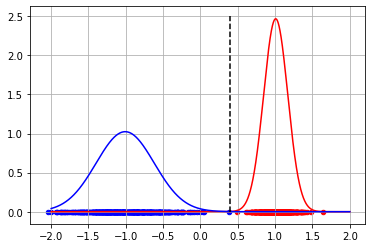

In [170]:
#plotting the distribution functions for both the classes
x = np.linspace(x_min,x_max,pts)
plt.plot(x,y0,color='red')
plt.plot(x,y1,color='blue')
plt.grid()
w_x = [x_intersect,x_intersect]
w_y = [0,2.5]
plt.plot(w_x,w_y,color='black',label='discriminant line', linestyle = 'dashed')

tp = 0
fp = 0
tn = 0
fn = 0
for x in class_pro[0]:
    plt.scatter(x, 0, s = 20, color = 'red')
    if (x_intersect - x)/(x_intersect - means[0]) >= 0:
        tp += 1
    elif (x_intersect - x)/(x_intersect - means[0]) < 0:
        fn += 1

for x in class_pro[1]:
    plt.scatter(x, 0, s = 20, color = 'blue')
    if (x_intersect - x)/(x_intersect - means[1]) < 0:
        fp += 1
    elif (x_intersect - x)/(x_intersect - means[1]) >= 0:
        tn += 1

Precision = tp / (tp + fp)
Recall = tp / (tp + fn)
Accuracy = (tp + tn) * 100/(tp + tn + fp + fn)
F_Score = 2 * Precision * Recall / (Precision + Recall)
print('The intersection  point (classification threshold) is = {}'.format( x_intersect))
print("True positives {}".format(tp))
print("True negaitives {}".format(tn))
print("False positives {}".format(fp))
print("False negatives {}".format(fn))
print("Accuracy is {} %".format(Accuracy))
print("Precision is {}".format(Precision))

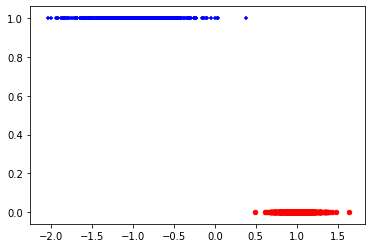

In [158]:
#plot of reduced clusters
for x in class_pro[0]:
    plt.scatter(x, 0, s = 20, color = 'red',marker='o')
    
for x in class_pro[1]:
    plt.scatter(x, 1, s = 20, color = 'blue',marker='+')

In [159]:
# x = np.linspace(x_min,x_max,pts)


# plt.plot(x,y0,color='red')
# plt.grid()
# plt.xlim(x_min,x_max)
# plt.plot(w_x,w_y,color='black',label='discriminant line')
# plt.title('Normal Dis Curve 1', fontsize = 10)
# plt.show()

# plt.plot(x,y1,color='blue')
# plt.grid()
# plt.xlim(x_min,x_max)
# plt.plot(w_x,w_y,color='black',label='discriminant line')
# plt.title('Normal Dis Curve 2', fontsize = 10)
# plt.show()

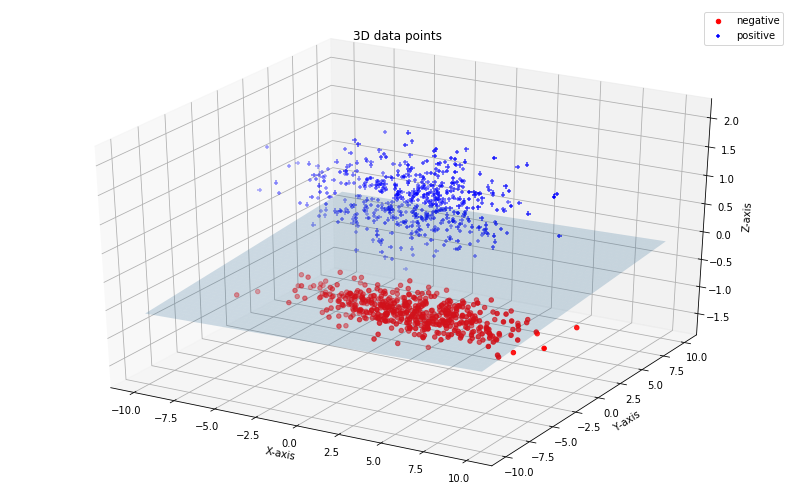

In [160]:
# Plot the data

class0 = data[class_pos[0]][:,0]
class1 = data[class_pos[1]][:,0]

x1 = class0[:,0]
y1 = class0[:,1]
z1 = class0[:,2]

x2 = class1[:,0]
y2 = class1[:,1]
z2 = class1[:,2]

# Creating figure
fig = plt.figure(figsize = (14, 9))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x1, y1, z1, color = "red",marker='o',label='negative')
ax.scatter3D(x2, y2, z2, color = "blue",marker ='+',label='positive')
plt.title("3D data points")
ax.set_xlabel('X-axis') 
ax.set_ylabel('Y-axis') 
ax.set_zlabel('Z-axis')

#plot the discriminant line
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
X1,X2 = np.meshgrid(x1,x2)
x3 = (0.3628485625685012 -(0.00655686*X1+0.01823739*X2))/(-0.99981218)
ax.plot_surface(X1,X2,x3,alpha=0.2)
plt.legend()
 # show plot
plt.show()
